=== PERFORMANCE COMPARISON ===
   Ukuran Data (n)  Waktu Rekursif (ms)  Waktu Iteratif (ms)
0               10             0.016135             0.012118
1               20             0.020964             0.017020
2              100             0.112255             0.402002
3             1000             3.299463            98.455376
4            10000            23.163435          7494.963696


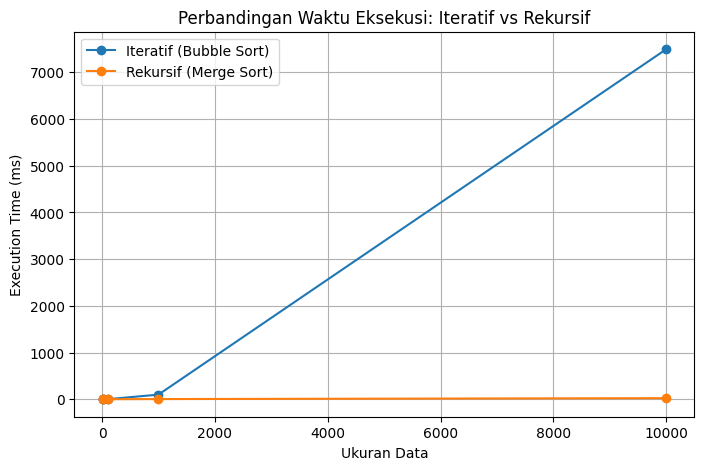

In [5]:
import time
import random
import copy
import pandas as pd
import matplotlib.pyplot as plt

# ======================
# Bubble Sort (Iteratif)
# ======================
def bubble_sort(arr):
    n = len(arr)
    for i in range(n):
        for j in range(0, n - i - 1):
            if arr[j] > arr[j + 1]:
                arr[j], arr[j + 1] = arr[j + 1], arr[j]

# ======================
# Merge Sort (Rekursif)
# ======================
def merge_sort(arr):
    if len(arr) > 1:
        mid = len(arr) // 2
        left = arr[:mid]
        right = arr[mid:]

        merge_sort(left)
        merge_sort(right)

        i = j = k = 0
        while i < len(left) and j < len(right):
            if left[i] < right[j]:
                arr[k] = left[i]
                i += 1
            else:
                arr[k] = right[j]
                j += 1
            k += 1

        while i < len(left):
            arr[k] = left[i]
            i += 1
            k += 1

        while j < len(right):
            arr[k] = right[j]
            j += 1
            k += 1

# ======================
# PENGUJIAN
# ======================
input_sizes = [10, 20, 100, 1000, 10000]
bubble_times = []
merge_times = []

for n in input_sizes:
    data = [random.randint(1, 100000) for _ in range(n)]

    # Bubble Sort
    data_bubble = copy.deepcopy(data)
    start = time.perf_counter()
    bubble_sort(data_bubble)
    end = time.perf_counter()
    bubble_times.append((end - start) * 1000)  # ms

    # Merge Sort
    data_merge = copy.deepcopy(data)
    start = time.perf_counter()
    merge_sort(data_merge)
    end = time.perf_counter()
    merge_times.append((end - start) * 1000)  # ms

# ======================
# TABEL HASIL
# ======================
df = pd.DataFrame({
    "Ukuran Data (n)": input_sizes,
    "Waktu Rekursif (ms)": merge_times,
    "Waktu Iteratif (ms)": bubble_times
})

print("=== PERFORMANCE COMPARISON ===")
print(df)

# ======================
# GRAFIK PERBANDINGAN
# ======================
plt.figure(figsize=(8,5))
plt.plot(input_sizes, bubble_times, marker='o', label="Iteratif (Bubble Sort)")
plt.plot(input_sizes, merge_times, marker='o', label="Rekursif (Merge Sort)")
plt.xlabel("Ukuran Data")
plt.ylabel("Execution Time (ms)")
plt.title("Perbandingan Waktu Eksekusi: Iteratif vs Rekursif")
plt.legend()
plt.grid(True)
plt.show()
